In [1]:
# Create workflow to calculate the bmi of a person using langgraph

In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
import os
from dotenv import load_dotenv
load_dotenv()

In [3]:
# define state
class StateBMI(TypedDict):
    height:float
    weight:float
    bmi:float
    person_status:str

In [4]:
# define the node to calculate the bmi
def calculate_bmi(state:StateBMI)->StateBMI:
    height = state['height']
    weight = state['weight']

    bmi = weight/(height**2)
    state['bmi'] = round(bmi,2)
    return state

In [5]:
# add node to check person is underweight, healthy or overweight
def check_bmi(state:StateBMI)->StateBMI:
    if state['bmi']<18.5:
        state['person_status'] = "underweight"

    elif state['bmi']>=18.5 and state['bmi']<=24.9:
        state['person_status'] = "healthy"

    else:
        state['person_status'] = "overweight"
    return state

In [6]:
# define the graph
graph = StateGraph(StateBMI)

# add nodes to the graph
graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("check_bmi",check_bmi)

# add edges to the graph
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi","check_bmi")
graph.add_edge("check_bmi",END)

# compile the graph
workflow = graph.compile()
print(workflow)

In [7]:
initial_state = {"height": 1.8, "weight": 80}
final_state = workflow.invoke(initial_state)
print(final_state)

{'height': 1.8, 'weight': 80, 'bmi': 24.69, 'person_status': 'healthy'}


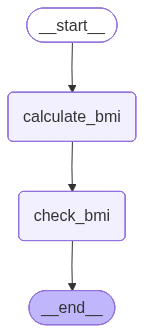

In [8]:
# display the workflow
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
# 